In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import sage_data_client

In [23]:
parameters = ["temperature", "relative_humidity", "pressure"]
df_all = dict()

for parameter in parameters:

    df_all[parameter] = sage_data_client.query(
            start="2023-02-10T00:00:00",
            end="2023-02-12T00:00:00",
            filter={
                "name": f"env.{parameter}",
                "sensor": "bme680",
                "vsn":"W083",
            }
        )

In [25]:
df_all = {k:v[["timestamp", "value"]] for k,v in df_all.items()}

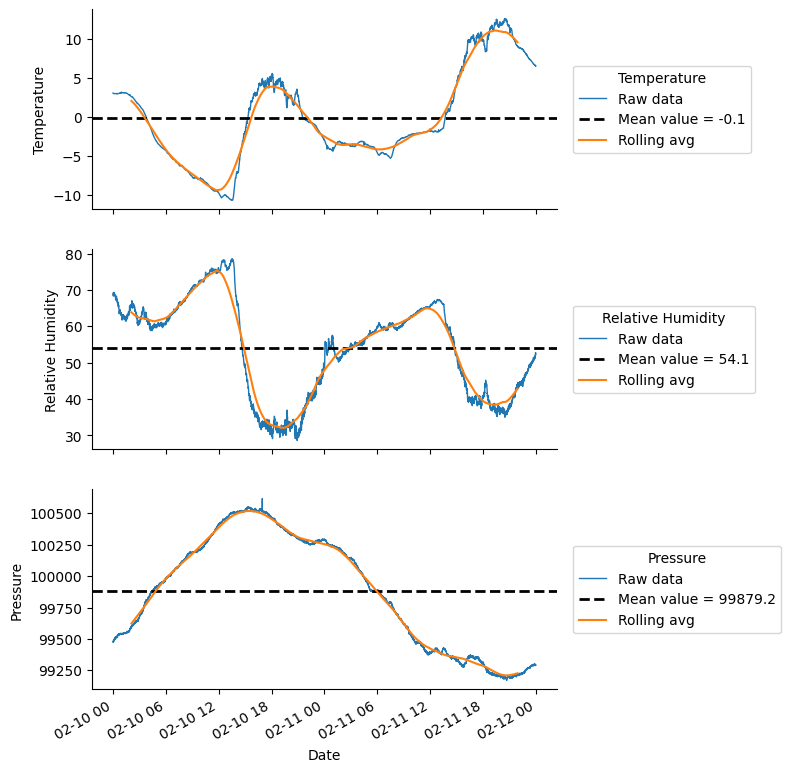

In [33]:
fig, axs = plt.subplots(3,1, figsize=[6,10], sharex=True)

for ax, (k,df) in zip(axs, df_all.items()):
    
    ## Calculations
    mean_value = df["value"].mean()
    rolling_avg = df["value"].rolling(500, center=True).mean()
    
    ## Plots
    df.set_index("timestamp").value.plot(ax=ax, lw=1)
    ax.axhline(y=mean_value, ls="dashed", lw=2, c="black")
    ax.plot(df["timestamp"], rolling_avg)
    
    ## Styling
    ax.set_ylabel(f"{k.title().replace('_', ' ')}")
    ax.spines[["top","right"]].set_visible(False)
    ax.legend([
            "Raw data", 
            f"Mean value = {mean_value:.1f}",
            "Rolling avg"],
        loc="center left",
        bbox_to_anchor=[1.02, 0.5],
        title=k.title().replace("_", " "))

axs[-1].set_xlabel("Date")
plt.show()
